In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [173]:
df = pd.read_csv('../data/treated_data/data.csv')
df.head()

,id,email_content,email_type
0,00001.7848dde101aa985090474a91ec93fcf0,\n\n\n\n\n\n\n\n\n\n\n\n\n\nSave up to 70% on ...,spam
1,00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\nURL\n\n2) Slim D...,spam
2,00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\nURL\n\n2) Slim D...,spam
3,00004.eac8de8d759b7e74154f142194282724,##############################################...,spam
4,00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n1) Slim Down ...,spam


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             3000 non-null   object
 1   email_content  2999 non-null   object
 2   email_type     3000 non-null   object
dtypes: object(3)
memory usage: 70.4+ KB


In [175]:
# Checando e dropando NaN 

print(df.isna().sum())
df_tr1 = df.dropna()

id               0
email_content    1
email_type       0
dtype: int64


In [176]:
# Checando emails duplicados e removendo emails duplicados

print(f"Duplicated emails: {df_tr1['email_content'].duplicated().sum()}")
df_tr2 = df_tr1[~df_tr1['email_content'].duplicated()]

Duplicated emails: 90


# Pré-processamento

In [177]:
# Remover pontuação, /n, stop_words, fazer steeming, 

In [178]:
# Lowercase

email_content = df_tr2['email_content']
email_content = email_content.apply(lambda x: x.lower())

In [179]:
# Remove numbers

email_content = email_content.apply(lambda x: re.sub(r'\d+', '', x))

In [180]:
# Replacing dots with spaces

email_content = email_content.apply(lambda x: re.sub("[.]", " ", x))

In [181]:
# Removing punkt

import string

email_content = email_content.apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

In [182]:
# Removing \n

email_content = email_content.str.replace('\n', ' ')

In [183]:
# Removing excessive spacing

email_content = email_content.apply(lambda x: re.sub(r'\s{2,}', ' ', x))

In [184]:
# Removing trailing spaces

email_content = email_content.str.strip()

In [185]:
# Removing decoding errors

from unidecode import unidecode
email_content = email_content.apply(lambda x: unidecode(x, errors="preserve"))

In [236]:
df_tr2['email_content'] = email_content
df_tr2

<ipython-input-236-6d46d34c3e5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr2['email_content'] = email_content


,id,email_content,email_type
0,00001.7848dde101aa985090474a91ec93fcf0,save up to on life insurance why spend more th...,spam
1,00002.d94f1b97e48ed3b553b3508d116e6a09,fight the risk of cancer url slim down guarant...,spam
2,00003.2ee33bc6eacdb11f38d052c44819ba6c,fight the risk of cancer url slim down guarant...,spam
3,00004.eac8de8d759b7e74154f142194282724,adult club offers free membership instant acce...,spam
4,00005.57696a39d7d84318ce497886896bf90d,i thought you might like these slim down guara...,spam
...,...,...,...
2995,02496.aae0c81581895acfe65323f344340856,man killed trying to surf on tube train ananov...,ham
2996,02497.60497db0a06c2132ec2374b2898084d3,hi gianni a very good resource for this is url...,ham
2997,02498.09835f512f156da210efb99fcc523e21,gianni ponzi wrote i have a prob when trying t...,ham
2998,02499.b4af165650f138b10f9941f6cc5bce3c,neale pickett nealewoozle org writes skip mont...,ham


In [239]:
df_tr2['email_content'][10]

'cellular phone accessories all at below wholesale prices url hands free ear buds phone holsters booster antennas only phone cases car chargers face plates as low as lithium ion batteries as low as url click below for accessories on all nokia motorola lg nextel samsung qualcomm ericsson audiovox phones at below wholesale prices url if you need assistance please call us to be removed from future mailings please send your remove request to removemenowbtamail net cn thank you and have a super day'

Excelent resource on text-preprocessing

https://towardsdatascience.com/elegant-text-pre-processing-with-nltk-in-sklearn-pipeline-d6fe18b91eb8

# EDA

In [19]:
# Sentiment analysis
# Email type analysis
# Word cloud (talvez precise de um tokenizer)

In [190]:
# Verificando proporções dos targets

df_tr2['email_type'].value_counts(normalize=True)

ham     0.845995
spam    0.154005
Name: email_type, dtype: float64

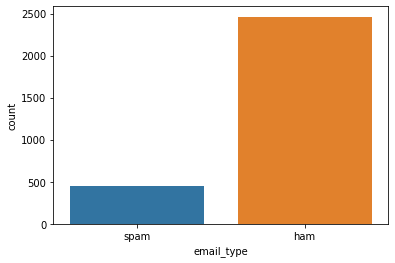

In [24]:
ax = sns.countplot(x=df_tr2['email_type'])
# count.text(x,y,s)

In [191]:
# Sentiment analysis

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment_analyzer = SentimentIntensityAnalyzer()

df_tr3 = df_tr2.copy()
df_tr3['negative_sentiment'] = df_tr3['email_content'].apply(lambda x: sentiment_analyzer.polarity_scores(x)['neg'])
df_tr3['neutral_sentiment'] = df_tr3['email_content'].apply(lambda x: sentiment_analyzer.polarity_scores(x)['neu'])
df_tr3['positive_sentiment'] = df_tr3['email_content'].apply(lambda x: sentiment_analyzer.polarity_scores(x)['pos'])

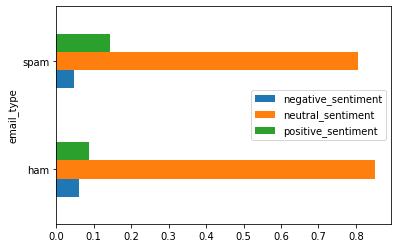

In [192]:
# Plotting mean sentiment distribution

mean_sentiment = df_tr3[['negative_sentiment', 
                         'neutral_sentiment', 
                         'positive_sentiment', 
                         'email_type']].groupby('email_type').mean()

mean_sentiment.plot(kind='barh')
plt.show()

In [193]:
mean_sentiment

,negative_sentiment,neutral_sentiment,positive_sentiment
email_type,,,
ham,0.061228,0.851845,0.086942
spam,0.047228,0.804583,0.143799


In [212]:
# Word cloud

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

text = ''.join(df_tr2['email_content'])

In [213]:
# from nltk.tokenize import word_tokenize

# tokens = word_tokenize(df_tr2['email_content'], language='english')
# tokens

# Treinando modelos

In [214]:
# Train test split

X = df_tr2['email_content']
y = df_tr2['email_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [225]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Testar wordtovec
tfidf = TfidfVectorizer(stop_words=stop_words)
forest_clf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)

pipeline = Pipeline([('vectorizer', tfidf), 
                     ('model', forest_clf)])

pipeline.fit(X_train, y_train)

cv = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=5, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.6s finished


In [230]:
cv.mean()

0.9755041764733029

In [ ]:
# Adicionar outros modelos

# Deep Learning

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Avaliação final

In [226]:
X_test_tr = pipeline.named_steps['vectorizer'].transform(X_test)

In [229]:
# Avaliando

y_pred = pipeline.named_steps['model'].predict(X_test_tr)

# Verificando acurácia

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       492
        spam       0.99      0.88      0.93        90

    accuracy                           0.98       582
   macro avg       0.98      0.94      0.96       582
weighted avg       0.98      0.98      0.98       582



In [ ]:
# Add email type
# Balanceamento